In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('IDEA.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,8.05,8.10,7.95,8.05,8.05,76771472,NaN
2022-11-28,8.10,8.15,8.00,8.05,8.05,47234426,NaN
2022-11-29,8.10,8.15,8.00,8.05,8.05,57370817,NaN
2022-11-30,8.05,8.30,8.00,8.25,8.25,75150800,NaN
2022-12-01,8.30,8.30,8.10,8.15,8.15,58794481,NaN


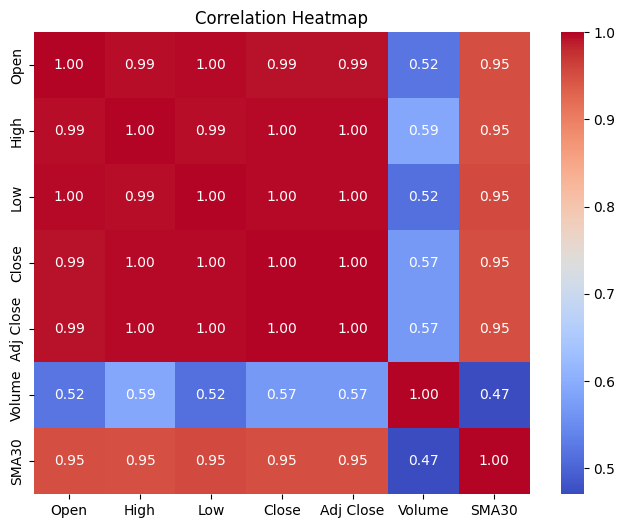

In [ ]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [ ]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.0383

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.0383
0.0383
0.0


In [ ]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,14.65,15.05,14.0,14.15,14.15,359762952,12.493333,-0.0279,0.033993,0.033993
2023-11-21,14.30,14.35,13.7,13.85,13.85,210863398,12.590000,-0.0214,0.033942,0.033942
2023-11-22,13.80,13.85,13.3,13.50,13.50,207998055,12.676667,-0.0256,0.033905,0.033905
2023-11-23,13.55,13.80,13.4,13.60,13.60,168569500,12.761667,0.0074,0.033824,0.033824
2023-11-24,13.65,13.75,13.3,13.35,13.35,128887582,12.811667,-0.0186,0.033765,0.033765


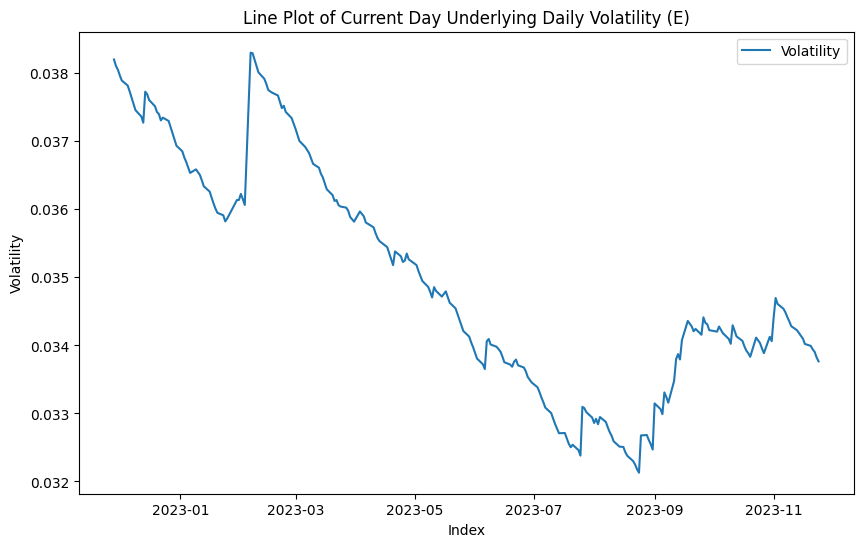

In [ ]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


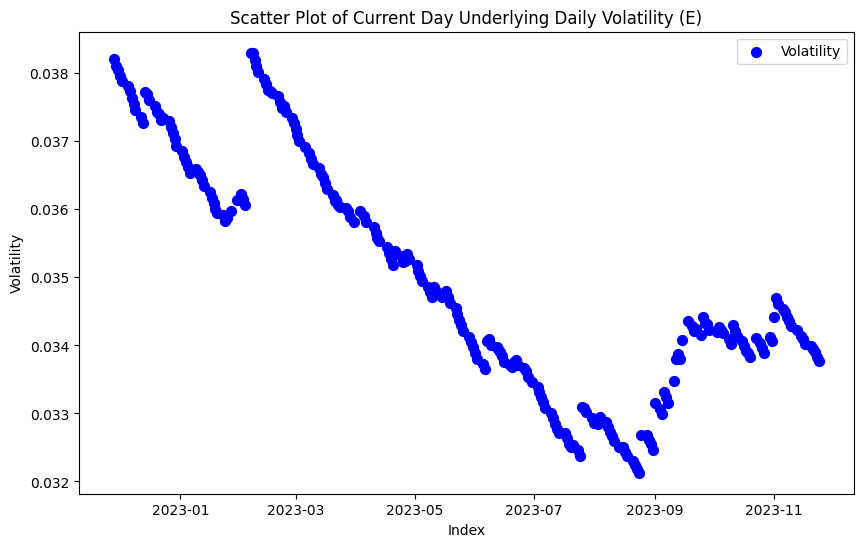

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

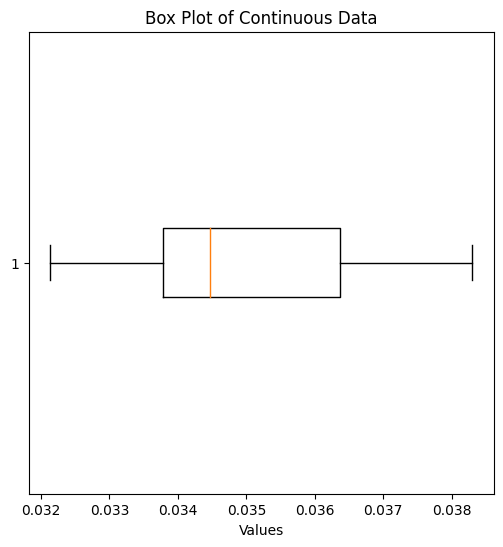

In [ ]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-48-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


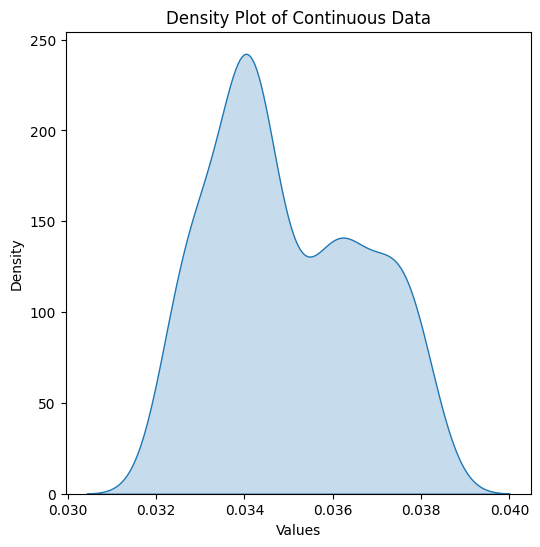

In [ ]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [ ]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,8.10,8.15,8.00,8.05,8.05,47234426,NaN,0.0000,0.038204,0.038204
2022-11-29,8.10,8.15,8.00,8.05,8.05,57370817,NaN,0.0000,0.038109,0.038109
2022-11-30,8.05,8.30,8.00,8.25,8.25,75150800,NaN,0.0245,0.038053,0.038053
2022-12-01,8.30,8.30,8.10,8.15,8.15,58794481,NaN,-0.0122,0.037967,0.037967
2022-12-02,8.15,8.35,8.15,8.30,8.30,50332214,NaN,0.0182,0.037894,0.037894


In [ ]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [ ]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [ ]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,14.65,15.05,14.0,14.15,14.15,359762952,-0.0279,0.033993
2023-11-21,14.30,14.35,13.7,13.85,13.85,210863398,-0.0214,0.033942
2023-11-22,13.80,13.85,13.3,13.50,13.50,207998055,-0.0256,0.033905
2023-11-23,13.55,13.80,13.4,13.60,13.60,168569500,0.0074,0.033824
2023-11-24,13.65,13.75,13.3,13.35,13.35,128887582,-0.0186,0.033765


In [ ]:
last_y

Date
2023-11-20    0.033993
2023-11-21    0.033942
2023-11-22    0.033905
2023-11-23    0.033824
2023-11-24    0.033765
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [ ]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,8.10,8.15,8.00,8.05,8.05,47234426,0.0000,0.038204
2022-11-29,8.10,8.15,8.00,8.05,8.05,57370817,0.0000,0.038109
2022-11-30,8.05,8.30,8.00,8.25,8.25,75150800,0.0245,0.038053
2022-12-01,8.30,8.30,8.10,8.15,8.15,58794481,-0.0122,0.037967
2022-12-02,8.15,8.35,8.15,8.30,8.30,50332214,0.0182,0.037894
...,...,...,...,...,...,...,...,...
2023-11-10,14.15,14.45,13.65,13.70,13.70,249891022,-0.0145,0.034283
2023-11-13,14.00,14.05,13.70,13.95,13.95,104362588,0.0181,0.034221
2023-11-15,14.05,14.20,13.80,14.05,14.05,163370284,0.0071,0.034139


In [ ]:
x.shape

(242, 8)

In [ ]:

y.shape

(242,)

Polynomial regression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(193, 8)
(49, 8)
(193,)
(49,)


In [ ]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [ ]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,6.70,6.90,6.65,6.80,6.80,67725048,0.0148,0.037264
2023-02-20,7.20,7.25,6.85,7.05,7.05,152049838,-0.0280,0.037674
2023-09-01,9.15,10.40,9.10,10.00,10.00,723352196,0.0998,0.033147
2023-10-06,11.20,11.30,10.85,10.95,10.95,122177842,-0.0226,0.034179
2023-05-10,6.85,6.85,6.55,6.75,6.75,101392533,-0.0074,0.034704


In [ ]:
poly = PolynomialFeatures(degree=8)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [ ]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 0.00010459742202360956
Mean aboslute Error: 0.0032301628332897345
Mean absolute percentage Error: 0.09408959338340084


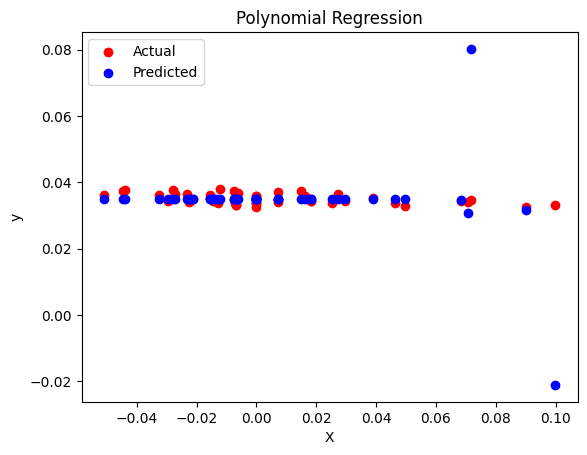

In [ ]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
print(y_pred[:10])


[ 0.0350733   0.03507273 -0.02116376  0.03507279  0.0350732   0.0350732
  0.03507331  0.03507016  0.08024256  0.0350733 ]


In [ ]:
print(x_test[:10])

             Open   High    Low  Close  Adj Close     Volume  \
Date                                                           
2023-02-28   6.70   6.90   6.65   6.80       6.80   67725048   
2023-02-20   7.20   7.25   6.85   7.05       7.05  152049838   
2023-09-01   9.15  10.40   9.10  10.00      10.00  723352196   
2023-10-06  11.20  11.30  10.85  10.95      10.95  122177842   
2023-05-10   6.85   6.85   6.55   6.75       6.75  101392533   
2023-11-13  14.00  14.05  13.70  13.95      13.95  104362588   
2023-07-05   7.50   7.55   7.35   7.40       7.40   52251221   
2023-10-05  11.55  11.60  11.05  11.20      11.20  164929055   
2023-11-02  13.15  13.85  12.80  13.75      13.75  643741830   
2023-03-27   6.25   6.30   6.00   6.05       6.05   73481124   

            Underlying Log Returns (C)  Previous Day Underlying Volatility (D)  
Date                                                                            
2023-02-28                      0.0148                               

In [ ]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.0343 0.0351 0.0351 0.0351 0.0351]


2.KNN Regressor

Mean Squared Error: 2.9737653810840357e-06
Mean aboslute Error: 0.001334820613861194
Mean absolute percentage Error: 0.03834020960025272


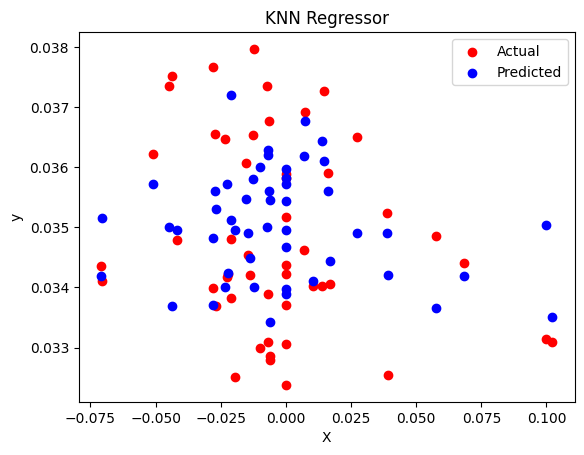

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

Best Hyperparameters: {'kernel': 'sigmoid', 'gamma': 7.58853162336289, 'epsilon': 0.002247883972880782, 'C': 271.76407975878556}
Mean Squared Error: 2.532939565765656e-06
Mean aboslute Error: 0.0014083197435283829
Mean absolute percentage Error: 0.04062931264332488
Mean Squared Error with Best Hyperparameters: 2.532939565765656e-06


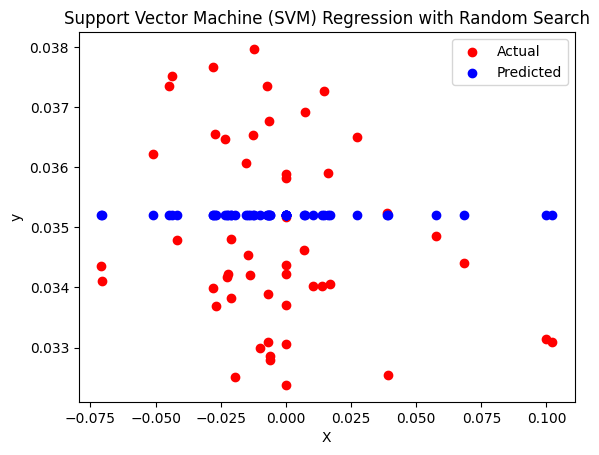

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 3.0290014985600295e-05
Mean aboslute Error: 0.0020534268484751054
Mean absolute percentage Error: 0.057522307491191534
Mean Squared Error: 3.0290014985600295e-05
(50, 7)
(50,)


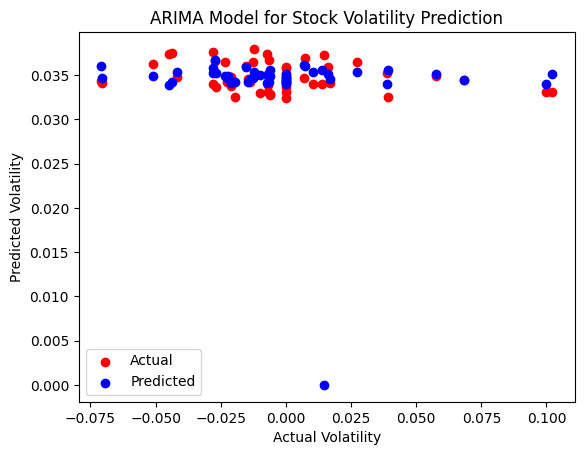

In [ ]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [ ]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 4.19064495540329e-10
Mean aboslute Error: 1.597001063714104e-05
Mean absolute percentage Error: 0.00045618810919887515


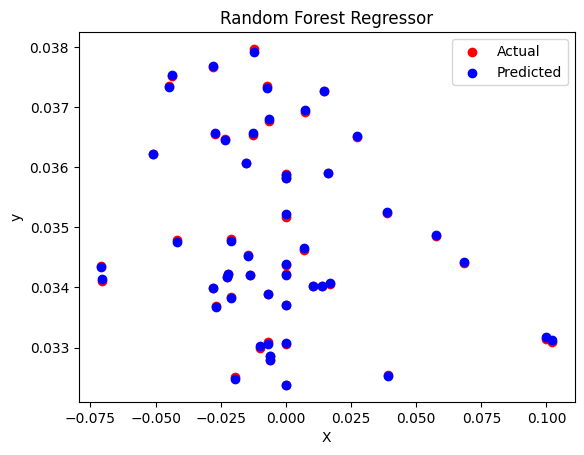

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 7s 23ms/step - loss: 2.1745e-04
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 5.3645e-05
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 5.2563e-05
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 1.7877e-05
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 1.0557e-05
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 9.5478e-06
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 4.8697e-06
Epoch 8/100
7/7 [==============================] - 0s 21ms/step - loss: 2.7085e-06
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 1.1682e-06
Epoch 10/100
7/7 [==============================] - 0s 20ms/step - loss: 8.7940e-07
Epoch 11/100
7/7 [==============================] - 0s 19ms/step - loss: 6.6082e-07
Epoch 12/100
7/7 [==============================] - 0s 23ms/step - loss: 7.0751e-07
E

Mean Squared Error: 9.624866096418585e-08
Mean aboslute Error: 0.00023143917084078342
Mean absolute percentage Error: 0.006701605187862883
(50,)
(50,)


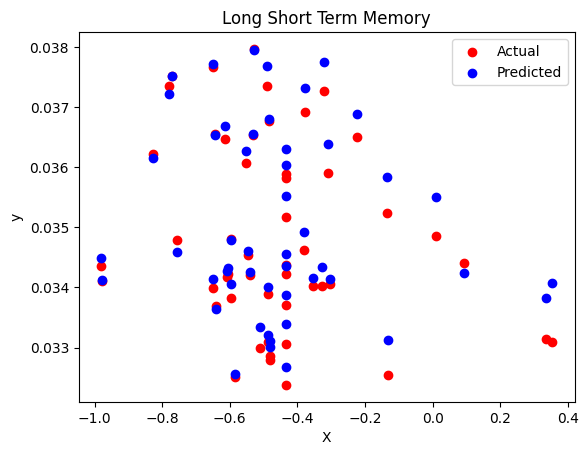

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long Short Term Memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 4s 12ms/step - loss: 0.0734
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0209
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0074
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 8.9333e-04
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 4.5891e-04
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 2.6980e-04
Epoch 11/100
7/7 [==============================] - 0s 15ms/step - loss: 2.2320e-04
Epoch 12/100
7/7 [==============================] - 0s 12ms/step - loss: 1.6956e-04
Epoch 13/100
7/7 [===========

Mean Squared Error: 4.865706156646116e-05
Mean aboslute Error: 0.004784559910079914
Mean absolute percentage Error: 0.13759116454413087
(50,)
(50,)


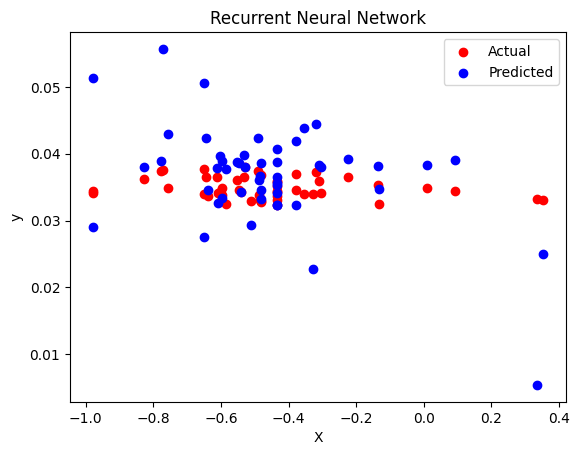

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent Neural Network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()